In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class, vari_short_timescale
import gPhoton
from download_isochrone import load_isochrone
from extinction import add_colors_and_abs_mag
import plotly.graph_objects as go
from simbad_download import fetch_catalog_id
import pyvo as vo

from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u

In [26]:
CLUSTER_NAME: str = 'NGC 188'

In [27]:
bss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')

bss_candidates = add_colors_and_abs_mag(bss_candidates)
yss_candidates = add_colors_and_abs_mag(yss_candidates)

In [28]:
sources = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [29]:
sim2 = Simbad()
n_obj = sim2.query_bibobj('2015ApJ...814..163G')

In [30]:
bss_lit = n_obj.to_pandas()

In [31]:
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
0,NGC 104,00 24 05.359,-72 04 53.20,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1
1,Cl* NGC 188 DGV 1666,00 26 44.6223,+85 18 35.993,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1
2,Cl* NGC 188 DGV 1874,00 34 48.0051,+85 32 27.395,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1
3,Cl* NGC 188 DGV 198,00 35 46.2973,+84 57 14.325,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1
4,Cl* NGC 188 DGV 237,00 40 15.5401,+85 03 48.459,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1


In [32]:
def get_gaia_dr3(main_id: str):
    try:
        return int([s[0] 
             for s 
             in Simbad.query_objectids(main_id).to_pandas().values 
             if 'EDR3' in str(s[0])][0]
            .decode('ascii')
            .replace('Gaia EDR3 ', ''))
    except:
        return None

In [33]:
def get_gaia_dr2(main_id: str):
    try:
        return int([s[0] 
             for s 
             in Simbad.query_objectids(main_id).to_pandas().values 
             if 'DR2' in str(s[0])][0]
            .decode('ascii')
            .replace('Gaia DR2 ', ''))
    except:
        return None

In [34]:
bss_lit['EDR3 id'] = np.vectorize(get_gaia_dr3)(bss_lit['MAIN_ID'].values)
bss_lit['DR2 id'] = np.vectorize(get_gaia_dr2)(bss_lit['MAIN_ID'].values)

In [35]:
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,00 24 05.359,-72 04 53.20,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
1,Cl* NGC 188 DGV 1666,00 26 44.6223,+85 18 35.993,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1,573998091072694912,573998091072694912
2,Cl* NGC 188 DGV 1874,00 34 48.0051,+85 32 27.395,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1,573961463591544064,573961463591544064
3,Cl* NGC 188 DGV 198,00 35 46.2973,+84 57 14.325,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1,573568078948251136,573568078948251136
4,Cl* NGC 188 DGV 237,00 40 15.5401,+85 03 48.459,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1,573933322966008960,573933322966008960


In [36]:
coords = SkyCoord(ra=bss_lit.RA, dec=bss_lit.DEC, unit=(u.hourangle, u.deg), frame=ICRS)

In [37]:
bss_lit.RA = coords.ra.value
bss_lit.DEC = coords.dec.value
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,6.022329,-72.081444,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
1,Cl* NGC 188 DGV 1666,6.685926,85.309998,14,14,0.0200,0.0214,90,A,O,2020yCat.1350....0G,1,573998091072694912,573998091072694912
2,Cl* NGC 188 DGV 1874,8.700021,85.540943,14,14,0.0211,0.0224,90,A,O,2020yCat.1350....0G,1,573961463591544064,573961463591544064
3,Cl* NGC 188 DGV 198,8.942905,84.953979,14,14,0.0142,0.0143,90,A,O,2020yCat.1350....0G,1,573568078948251136,573568078948251136
4,Cl* NGC 188 DGV 237,10.064750,85.063461,14,14,0.0259,0.0272,90,A,O,2020yCat.1350....0G,1,573933322966008960,573933322966008960


In [38]:
len(bss_lit.dropna(subset=['EDR3 id']))

22

In [39]:
bss_lit[pd.isnull(bss_lit['EDR3 id'])].head(10)

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID,EDR3 id,DR2 id
0,NGC 104,6.022329,-72.081444,7,7,NaN,NaN,0,C,I,2006AJ....131.1163S,1,None,None
12,NGC 188,11.800000,85.243333,4,4,NaN,NaN,0,D,O,2020A&A...633A..99C,1,None,None
24,NGC 2682,132.845833,11.813333,4,4,NaN,NaN,0,D,O,2020A&A...633A..99C,1,None,None
25,M 30,325.092167,-23.179861,6,6,100.0,100.0,90,C,O,2010AJ....140.1830G,1,None,None


In [40]:
bss_lit = bss_lit.dropna(subset=['EDR3 id'])

In [41]:
def get_cross_match(ra, dec, df):
    dist = u.arcsec.to(u.deg)
    a = df[np.isclose(ra, df.ra, dist) & np.isclose(dec, df.dec, dist)]
    try:
        return a['source_id'].values[0]
    except:
        return None

In [53]:
cross_matched_lit = bss_lit.apply(lambda x: get_cross_match(x['RA'], x['DEC'], sources), axis=1)
bss_lit['Gaia EDR3'] = cross_matched_lit

In [54]:
bss_lit = bss_lit.dropna(subset=['EDR3 id'])

In [55]:
in_bss_candidates = np.in1d(bss_lit['Gaia EDR3'].values,
                            bss_candidates['source_id'].values)
bss_lit['in_bss'] = in_bss_candidates

In [56]:
bss_lit = pd.merge(left=bss_lit, right=sources, left_on='Gaia EDR3', right_on='source_id',
                   suffixes=('_lit', '_src'))

In [57]:
in_cluster = np.in1d(bss_lit['Gaia EDR3'].values,
                     clustered['source_id'].values)

In [58]:
bss_lit['in_cluster'] = in_cluster
bss_lit.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,...,A_y_src,A_J_src,A_H_src,A_K_src,BP-RP_src,BP-RP_error_src,G_abs_src,G_abs_error_src,excess_src,in_cluster
0,Cl* NGC 188 DGV 1666,6.685926,85.309998,14,14,0.0200,0.0214,90,A,O,...,0.352377,0.221163,0.130851,0.084425,0.571064,0.001893,3.302747,0.092027,0.005883,True
1,Cl* NGC 188 DGV 198,8.942905,84.953979,14,14,0.0142,0.0143,90,A,O,...,0.156612,0.098295,0.058156,0.037522,0.718240,0.001535,2.342432,0.080358,-0.000019,False
2,Cl* NGC 188 DGV 237,10.064750,85.063461,14,14,0.0259,0.0272,90,A,O,...,0.352377,0.221163,0.130851,0.084425,0.705798,0.003497,4.056418,0.124364,0.008074,True
3,NGC 188 3151,10.527558,85.279800,14,14,0.0126,0.0119,90,A,O,...,0.391530,0.245737,0.145390,0.093806,0.616632,0.001233,2.377883,0.054560,0.005897,True
4,NGC 188 2046,10.586150,85.260976,14,14,0.0103,0.0093,90,A,O,...,0.391530,0.245737,0.145390,0.093806,0.584572,0.000663,1.529322,0.043625,0.005892,True


In [59]:
missed_bss = bss_lit[~bss_lit.in_bss]

In [60]:
len(missed_bss)

8

In [61]:
missed_bss.parallax_over_error_lit

1     27.022552
2     17.460733
5     27.530428
7     15.048694
15    11.926151
16    14.467278
17    15.087319
20    51.153877
Name: parallax_over_error_lit, dtype: float64

In [62]:
%matplotlib notebook

<IPython.core.display.Javascript object>


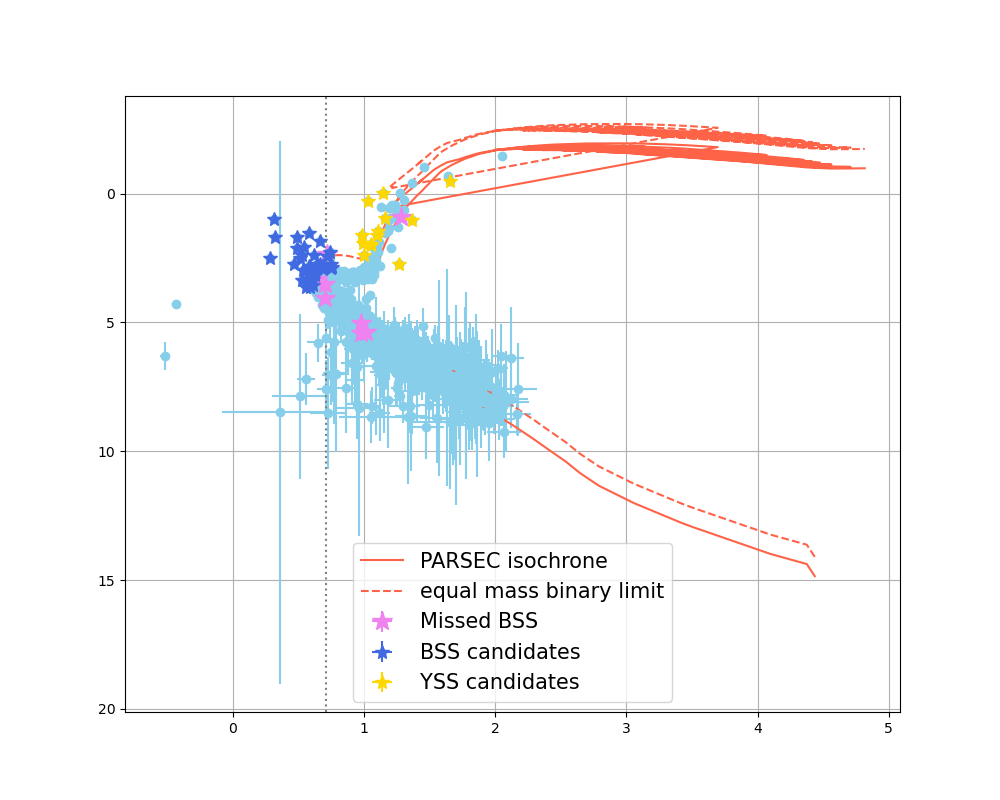

In [63]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.errorbar(clustered['BP-RP'], clustered['G_abs'],
             xerr=clustered['BP-RP_error'], yerr=clustered['G_abs_error'],
             color='skyblue', fmt='o')
plt.errorbar(missed_bss['BP-RP_src'], missed_bss['G_abs_src'],
             xerr=missed_bss['BP-RP_error_src'], yerr=missed_bss['G_abs_error_src'],
             color='violet', fmt='*', zorder=2, markersize=15.,
             label='Missed BSS')
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.grid()

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.show();

In [66]:
not_clustered = missed_bss[~missed_bss.in_cluster & (missed_bss.G_abs_src<3.5)]

In [67]:
not_clustered.parallax_over_error_src

1    27.022552
Name: parallax_over_error_src, dtype: float64

In [444]:
not_clustered.parallax_src

1    0.435717
Name: parallax_src, dtype: float64

In [445]:
not_clustered.pmra_src

1   -1.845753
Name: pmra_src, dtype: float64

<IPython.core.display.Javascript object>


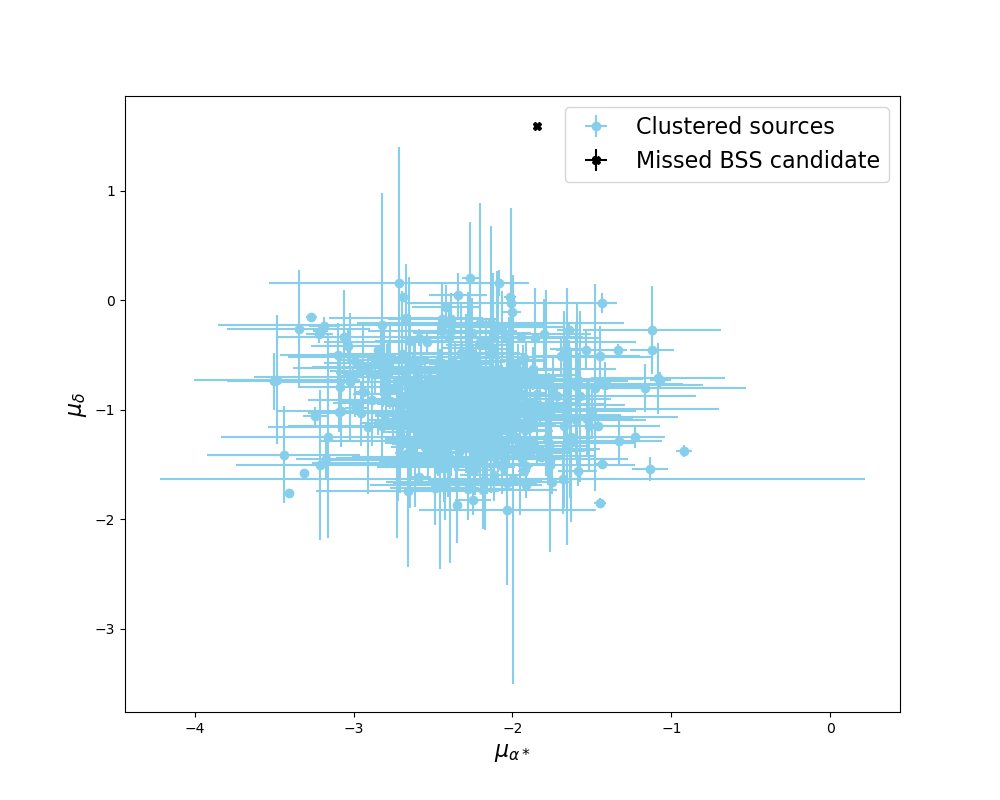

In [458]:
plt.figure(figsize=(10, 8))
plt.errorbar(clustered.pmra, clustered.pmdec, zorder=1, color='skyblue',
            fmt='o', xerr=clustered.pmra_error, yerr=clustered.pmdec_error,
            label='Clustered sources')
plt.errorbar(not_clustered.pmra_src, not_clustered.pmdec_src,
             xerr=not_clustered.pmra_error_src, yerr=not_clustered.pmdec_error_src,
             fmt='X', zorder=2, color='black',
             label='Missed BSS candidate')
plt.gca().set_xlabel('$\mu_{\\alpha*}$', fontsize=16)
plt.gca().set_ylabel('$\mu_\delta$', fontsize=16)
plt.legend(fontsize=16);

In [459]:
bss_candidates = pd.concat([bss_candidates,
                                clustered[np.isclose(clustered['BP-RP'], 0.6, 1e-2) & np.isclose(clustered['G_abs'], 3.75, .1)]])

In [460]:
yss_candidates = pd.concat([yss_candidates,
                            clustered[np.isclose(clustered['BP-RP'], 1.075, 1e-2) & np.isclose(clustered['G_abs'], 2.13, .01)]])

In [461]:
TO_COLOR = np.min(isochrone[:, 0])

In [462]:
yss_candidates = yss_candidates[yss_candidates['BP-RP']<1.25]

In [463]:
bss_candidates = bss_candidates[~((bss_candidates['BP-RP']>0.7) & (bss_candidates['G_abs']>2.75))]

<IPython.core.display.Javascript object>


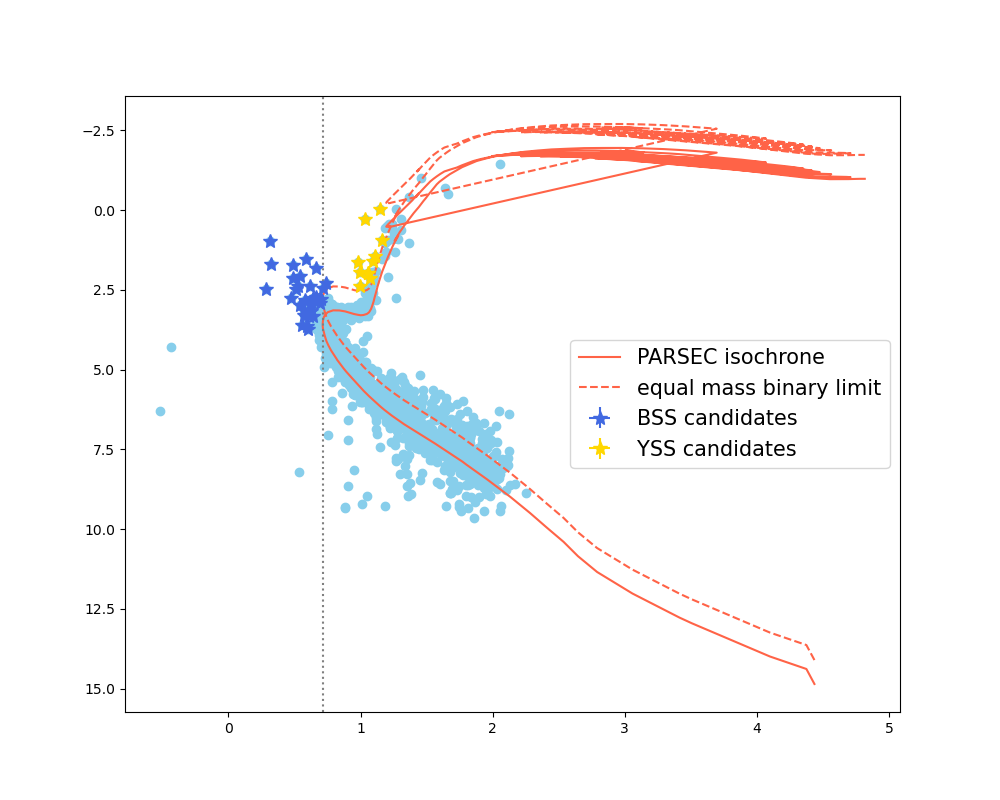

In [464]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue')
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.show();

# BSS variability

In [465]:
bss_candidates = add_colors_and_abs_mag(bss_candidates)

In [466]:
bss_candidates.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,label,outlier,excess
0,96412,1636148068921376768,Gaia DR3 573738468889035264,573738468889035264,135807148,2016.0,13.928628,0.015846,84.823386,0.013835,...,0.344032,0.203546,0.131328,0.640486,0.001370,2.739530,0.070370,252,-1.0,0.015451
1,101215,1636148068921376768,Gaia DR3 573937617933289856,573937617933289856,442857150,2016.0,12.523486,0.015359,85.165053,0.014466,...,0.319458,0.189007,0.121948,0.680570,0.001866,2.828010,0.069148,252,-1.0,0.014377
2,101295,1636148068921376768,Gaia DR3 573938305128033920,573938305128033920,1315389913,2016.0,12.227328,0.020073,85.210201,0.018288,...,0.170815,0.101062,0.065206,0.602583,0.001626,3.267815,0.077564,252,-1.0,0.003517
3,101307,1636148068921376768,Gaia DR3 573938408207239296,573938408207239296,451142942,2016.0,12.083431,0.013404,85.224191,0.011774,...,0.210178,0.124352,0.080232,0.288062,0.004546,2.483414,0.055733,252,-1.0,0.017241
4,101377,1636148068921376768,Gaia DR3 573939404639640704,573939404639640704,65868889,2016.0,13.107909,0.010876,85.257747,0.010012,...,0.245737,0.145390,0.093806,0.662986,0.000996,1.828611,0.047085,252,-1.0,0.006618


In [467]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [468]:
bss_classes = vari_class(bss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [469]:
bss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,573944283722429952,false,false,false,true,false,false,false,false,false,false,false
1,573945825613372160,false,false,false,false,false,false,false,false,false,false,false
2,573968576057423360,false,false,false,false,false,false,false,false,false,false,false


In [472]:
vari_short_timescale([573944283722429952])

INFO: Query finished. [astroquery.utils.tap.core]


,solution_id,source_id,amplitude_estimate,number_of_fov_transits,mean_of_fov_abbe_values,variogram_num_points,variogram_char_timescales,variogram_values,frequency
0,375316653866487564,573944283722429952,0.070808,45,1.00579,1,(0.176),(0.0023709204660254096),32.39746


In [487]:
bss_candidates.non_single_star

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
600    0
Name: non_single_star, dtype: int64

In [475]:
bss_candidates[bss_candidates.ruwe>1.4][['source_id', 'has_epoch_photometry', 'ruwe', 'excess']]

,source_id,has_epoch_photometry,ruwe,excess
5,573939954395446016,False,1.496976,0.004702
19,573942943692668416,False,1.410349,0.008893


In [476]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,label,outlier,excess
25,101993,1636148068921376768,Gaia DR3 573945825613372160,573945825613372160,1442349969,2016.0,9.774005,0.011069,85.155966,0.01107,...,0.221163,0.130851,0.084425,0.311924,0.001641,0.978831,0.036832,252,-1.0,0.003447


In [477]:
np.abs(bss_rv_amplitude.rv_amplitude_robust)>=6*bss_rv_amplitude.radial_velocity_error

25    True
dtype: bool

In [478]:
bss_rv_amplitude.parallax_over_error

25    58.95927
Name: parallax_over_error, dtype: float64

In [479]:
bss_rv_amplitude.ruwe

25    1.014542
Name: ruwe, dtype: float64

In [480]:
bss_rv_amplitude.G_abs

25    0.978831
Name: G_abs, dtype: float64

In [481]:
bss_rv_amplitude['BP-RP']

25    0.311924
Name: BP-RP, dtype: float64

In [482]:
for _, bss in bss_var.iterrows():
    print(f'{bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

10.849435637836107, 85.34240870140525:
NUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds
FUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101970.995 ], 114.000 seconds

9.7740046512694, 85.15596608877337:
NUV: 435.0s (raw) in 4 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101969.995 ], 113.000 seconds
    [ 820042006.995, 820042123.995 ], 117.000 seconds
    [ 842401239.995, 842401334.995 ], 95.000 seconds
FUV: 435.0s (raw) in 4 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 816101856.995, 816101969.995 ], 113.000 seconds
    [ 820042006.995, 820042123.995 ], 117.000 seconds
    [ 842401239.995, 842401334.995 ], 95.000 seconds

11.089231312827485, 85.44167325728058:
NUV: 224.0s (raw) in 2 exposures.
    [ 816095942.995, 816096052.995 ], 110.000 seconds
    [ 81610185

# YSS variability

In [483]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE']

In [484]:
yss_classes = vari_class(yss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [485]:
yss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,573941053907094144,false,false,false,false,false,false,false,false,false,false,false
1,573941393208434688,false,false,false,false,false,false,false,false,false,false,false


In [488]:
yss_candidates.non_single_star

0      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
12     0
734    0
Name: non_single_star, dtype: int64

In [489]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,label,outlier,excess
0,96482,1636148068921376768,Gaia DR3 573741423826924928,573741423826924928,1707904325,2016.0,14.137629,0.009772,84.977945,0.009203,...,0.294884,0.174468,0.112567,1.034944,0.000885,0.279925,0.040120,252,-1.0,0.013408
8,101610,1636148068921376768,Gaia DR3 573941393208434688,573941393208434688,1193481149,2016.0,11.987732,0.010597,85.248891,0.009593,...,0.294884,0.174468,0.112567,1.145790,0.003619,-0.034399,0.044542,252,-1.0,0.013726
12,102765,1636148068921376768,Gaia DR3 573967472248520448,573967472248520448,505142012,2016.0,11.873956,0.009157,85.403932,0.008523,...,0.270311,0.159929,0.103187,1.162327,0.000725,0.933115,0.036455,252,-1.0,0.010668


In [490]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

0     True
8     True
12    True
dtype: bool

In [491]:
len(bss_candidates)

32

In [492]:
len(yss_candidates)

11

In [494]:
bss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')